In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Cópulas Estatísticas

## Definição : https://www.maxwell.vrac.puc-rio.br/13354/13354_5.PDF

# Exemplo: Cópula Gaussiana e Cópula T de Student - Relacionando o ângulo de yaw e o vento em turbinas eólicas

In [44]:
# Obtendo os dados de uma normal multivariada
mu = [0, 0]
cov = [[1,0.65],[0.65,1]]
mvnorm = stats.multivariate_normal(mu, cov)
# Obtendo os ddos de uma t multivariada
df = 10
mvt    = stats.multivariate_t(mu ,cov,df = df)

In [58]:
# Amostrando 1000 pontos de cada uma 

x = mvnorm.rvs(500)
y = mvt.rvs(500)

# Obtendo as marginais de ambas as distribuições

norm = stats.norm()
tstud = stats.t(df)

# Convertendo cada conjunto de marginais em uniformes [0,1]

x_unif = norm.cdf(x)
x_unif2 = tstud.cdf(y)

In [59]:
# Utilizando as informações do problema físico

m1 = stats.uniform(loc = -25,scale = 50)
m2 = stats.weibull_min(c = 4.74,loc = 0,scale = 9.7)

In [60]:
# Transformando as marginais nas distribuições do problema de fato
# Cópula normal multivariada:

x1_trans = m1.ppf(x_unif[:, 0])
x2_trans = m2.ppf(x_unif[:, 1])

# Cópula para a distribuição t-multivariada com 5 graus de liberdade

x1_trans2 = m1.ppf(x_unif2[:, 0])
x2_trans2 = m2.ppf(x_unif2[:, 1])


# Cópula Gaussiana Multivariada

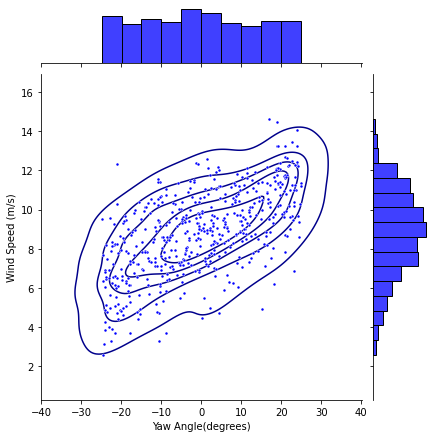

In [61]:
h = sns.jointplot(x = x1_trans, y = x2_trans,color = 'blue',marker = ".");
h.plot_joint(sns.kdeplot, color="darkblue", zorder=0, levels=6)
h.set_axis_labels('Yaw Angle(degrees)', 'Wind Speed (m/s)', fontsize=10)

# Cópula  T Multivariada

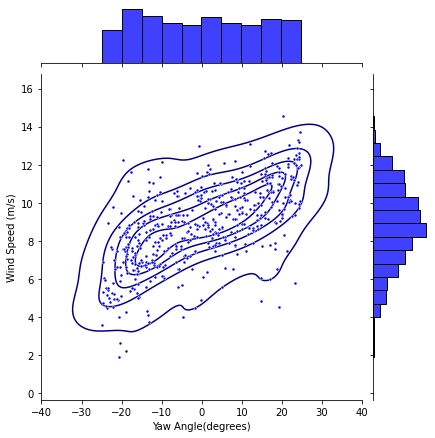

In [62]:
h = sns.jointplot(x = x1_trans2, y = x2_trans2,color = 'blue',marker = ".");
h.plot_joint(sns.kdeplot, color="darkblue", zorder=0, levels=6)
h.set_axis_labels('Yaw Angle(degrees)', 'Wind Speed (m/s)', fontsize=10)

# Modelo sem acoplamento

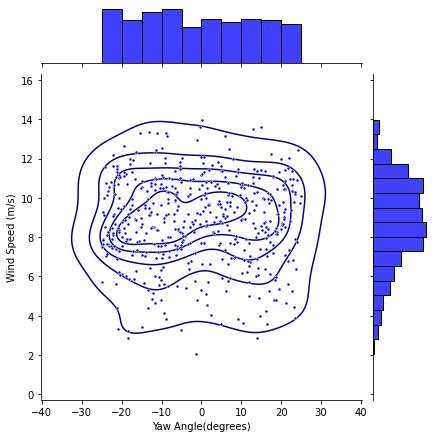

In [64]:
h = sns.jointplot(x = m1.rvs(500), y = m2.rvs(500),color = 'blue',marker = ".");
h.plot_joint(sns.kdeplot, color="darkblue", zorder=0, levels=6)
h.set_axis_labels('Yaw Angle(degrees)', 'Wind Speed (m/s)', fontsize=10)